In [1]:
from api import *
import matplotlib.pyplot as plt

In [2]:
clean_birmingham_report_df_norm = pd.read_feather('high_quality_traffic_reports/clean/clean_birmingham_report_df_norm')
clean_manchester_report_df_norm = pd.read_feather('high_quality_traffic_reports/clean/clean_manchester_report_df_norm')
clean_cambridge_report_df_norm = pd.read_feather('high_quality_traffic_reports/clean/clean_cambridge_report_df_norm')
clean_thorpe_report_df_norm = pd.read_feather('high_quality_traffic_reports/clean/clean_thorpe_report_df_norm')
clean_epping_report_df_norm = pd.read_feather('high_quality_traffic_reports/clean/clean_epping_report_df_norm')
clean_bristol_report_df_norm = pd.read_feather('high_quality_traffic_reports/clean/clean_bristol_report_df_norm')

### Local Traffic Model

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import seaborn as sns

In [4]:
def report_metrics(y_true, y_pred):
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"R^2: {r2_score(y_true, y_pred)}")

In [7]:
def local_mean_model(clean_report_df_norm, test_sites):
    train_report = clean_report_df_norm[~clean_report_df_norm.site_id.isin(test_sites)]
    test_report = clean_report_df_norm[clean_report_df_norm.site_id.isin(test_sites)]
    predictions = train_report.groupby('timestamp')['total_volume_normalised'].mean().to_frame().reset_index()
    true_values = test_report[['timestamp', 'total_volume_normalised']]
    pred_vs_true = pd.merge(true_values, predictions, on="timestamp", how='left')
    pred_vs_true.columns = ['timestamp', 'y_true', 'y_pred']
    pred_vs_true = pred_vs_true[~pred_vs_true.y_pred.isna()]
    
    report_metrics(pred_vs_true.y_true,pred_vs_true.y_pred)
    return predictions, true_values

In [8]:
birmingham_sites = ['9092', '9093','18212', '19227','10560', '10337', '10398','9490', '9491']
thorpe_sites = ['1910', '6134', '5107', '4648', '14547', '14484', '14496', '14463', '14433', '14437', '14470']
cambridge_sites = ['2166', '3092', '4178', '9676', '3092', '4178', '18577', '18594', '18841', '18628', '18676']
epping_sites = ['1548', '4695', '10431', '10564', '3798', '10340', '10519', '6776', '5439', '4660']
bristol_sites = ['6041', '5311', '5610', '1897', '5994', '3434', '3267']

print('Birmingham Metrics')
birmingham_predictions, birmingham_test_true_values = local_mean_model(clean_birmingham_report_df_norm, birmingham_sites)

print('\nCambridge Metrics')
cambridge_predictions, cambridge_test_true_values = local_mean_model(clean_cambridge_report_df_norm, cambridge_sites)

print('\nThorpe Metrics')
thorpe_predictions, thorpe_test_true_values = local_mean_model(clean_thorpe_report_df_norm, thorpe_sites)

print('\nEpping Metrics')
epping_predictions, epping_test_true_values = local_mean_model(clean_epping_report_df_norm, epping_sites)

print('\nBristol Metrics')
bristol_predictions, bristol_test_true_values = local_mean_model(clean_bristol_report_df_norm, bristol_sites)


Birmingham Metrics
MSE: 0.05842045409301278
MAE: 0.16024149406091415
R^2: 0.8966913579069208

Cambridge Metrics
MSE: 0.1624793292133809
MAE: 0.2590257599805602
R^2: 0.7452132953498833

Thorpe Metrics
MSE: 0.018395655245646007
MAE: 0.08899239287826638
R^2: 0.9595119072409148

Epping Metrics
MSE: 0.06822920980314402
MAE: 0.17569749604265758
R^2: 0.8372056681799716

Bristol Metrics
MSE: 0.002599043955037084
MAE: 0.029585832515237897
R^2: 0.9951927572529599


### Global Model

In [17]:
def global_mean_model(train_report, test_report):
    predictions = train_report.groupby('timestamp')['total_volume_normalised'].mean().to_frame().reset_index()
    true_values = test_report[['timestamp', 'total_volume_normalised']]
    pred_vs_true = pd.merge(true_values, predictions, on="timestamp", how='left')
    pred_vs_true.columns = ['timestamp', 'y_true', 'y_pred']
    pred_vs_true = pred_vs_true[~pred_vs_true.y_pred.isna()]

    report_metrics(pred_vs_true.y_true,pred_vs_true.y_pred)
    return predictions, true_values

In [20]:
print('Birmingham Metrics')
train_report = pd.concat([clean_manchester_report_df_norm, clean_cambridge_report_df_norm, clean_thorpe_report_df_norm, clean_epping_report_df_norm, clean_bristol_report_df_norm], ignore_index=True)
test_report = clean_birmingham_report_df_norm
birmingham_global_results = global_mean_model(train_report, test_report)

print('\nManchester Metrics')
train_report = pd.concat([clean_birmingham_report_df_norm, clean_cambridge_report_df_norm, clean_thorpe_report_df_norm, clean_epping_report_df_norm, clean_bristol_report_df_norm], ignore_index=True)
test_report = clean_manchester_report_df_norm
manc_global_results = glocal_mean_model(train_report, test_report)

print('\nCambridge Metrics')
train_report = pd.concat([clean_birmingham_report_df_norm, clean_manchester_report_df_norm, clean_thorpe_report_df_norm, clean_epping_report_df_norm, clean_bristol_report_df_norm], ignore_index=True)
test_report = clean_cambridge_report_df_norm
cambridge_global_results = global_mean_model(train_report, test_report)

print('\nThorpe Metrics')
train_report = pd.concat([clean_birmingham_report_df_norm, clean_manchester_report_df_norm, clean_cambridge_report_df_norm, clean_epping_report_df_norm, clean_bristol_report_df_norm], ignore_index=True)
test_report = clean_thorpe_report_df_norm
thorpe_results = global_mean_model(train_report, test_report)

print('\nEpping Metrics')
train_report = pd.concat([clean_birmingham_report_df_norm, clean_manchester_report_df_norm, clean_thorpe_report_df_norm, clean_cambridge_report_df_norm, clean_bristol_report_df_norm], ignore_index=True)
test_report = clean_epping_report_df_norm
epping_global_results = global_mean_model(train_report, test_report)

print('\nBristol Metrics')
train_report = pd.concat([clean_birmingham_report_df_norm, clean_manchester_report_df_norm, clean_thorpe_report_df_norm, clean_epping_report_df_norm, clean_cambridge_report_df_norm], ignore_index=True)
test_report = clean_bristol_report_df_norm
bristol_global_results = global_mean_model(train_report, test_report)

Birmingham Metrics
MSE: 0.0900277099194788
MAE: 0.19976164862909734
R^2: 0.8325338729470529

Manchester Metrics
MSE: 0.06748720334930364
MAE: 0.17490954725717084
R^2: 0.8690313463450416

Cambridge Metrics
MSE: 0.14842797108470746
MAE: 0.24700683100791082
R^2: 0.7886980061604865

Thorpe Metrics
MSE: 0.06037009558381122
MAE: 0.15839692815770365
R^2: 0.8757423656246094

Epping Metrics
MSE: 0.07812707951940683
MAE: 0.18257633267254034
R^2: 0.8261050393357328

Bristol Metrics
MSE: 0.09905870528818067
MAE: 0.20498618316381234
R^2: 0.8243681815707705


### Other

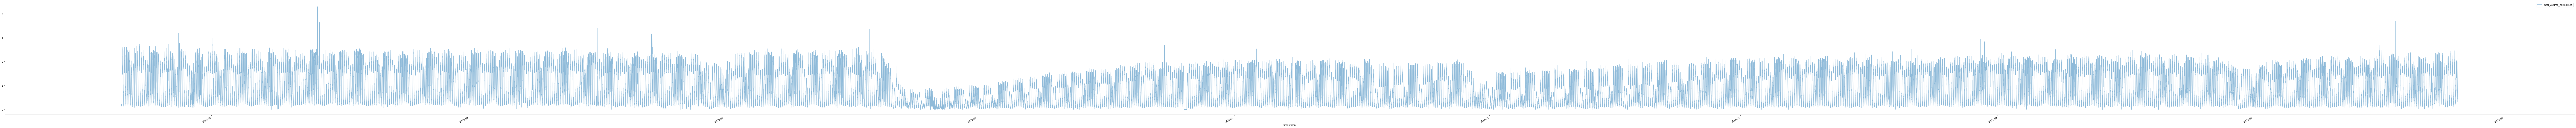

In [30]:
fig, ax = plt.subplots(figsize=(200,10))
clean_birmingham_report_df_norm.groupby('timestamp')['total_volume_normalised'].median().to_frame().reset_index().plot('timestamp', 'total_volume_normalised', ax=ax, alpha=0.5, kind='line')
plt.savefig('birmingham_median.png')
plt.show()